### Dataset Description 

The dataset consists of 10000 individuals and whether their credit card has defaulted or not. 

Column description:
- **default** : Whether the individual has defaulted
- **student** : Whether the individual is student
- **balance** : The balance in individual's account
- **income** : Income of individual

<b>Objective:</b>  Predict whether the individual will default in their credit card payment.

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
cred_df = pd.read_csv("../data/credit_card.csv")

In [4]:
cred_df.sample(5)

,default,student,balance,income
7463,No,No,175.167761,53019.423013
8839,No,Yes,903.438812,13028.150863
442,No,No,1322.297091,51792.402369
5043,No,No,0.000000,33322.482359
976,No,No,862.876514,36461.901130


In [5]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


Dataset contains both numerical and categorical values

In [6]:
cred_df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

<b>Observation</b>: There are no missing values

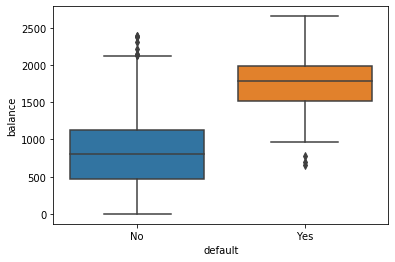

In [7]:
# Relation between balance and default

sns.boxplot(x='default', y='balance', data=cred_df)
plt.show()

** Observation: ** People who have more balance have defaulted more in their credit card payments.

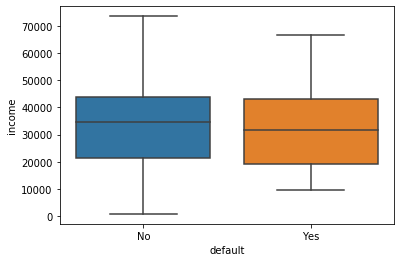

In [8]:
# Relation between income and default

sns.boxplot(x='default', y='income', data=cred_df)
plt.show()

** Observation: ** There is not much relation between income and whether they have defaulted in their credit card payments.

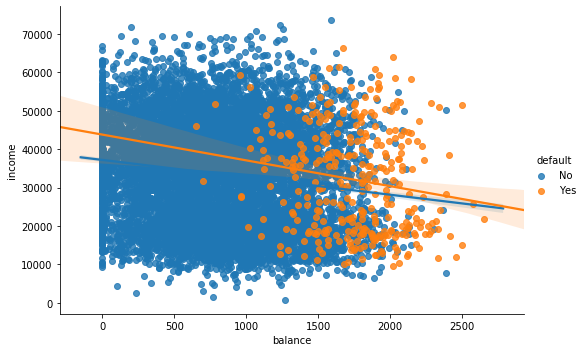

In [9]:
# Relation between balance and income and whether they have defaulted or not 

sns.lmplot(x='balance', y='income', hue = 'default', data=cred_df, aspect=1.5, fit_reg = True)
plt.show()

** Observation :** People who have more balance have more defaults.

In [10]:
# Convert Categorical to Numerical for default and student columns
for col in cred_df.columns:
    if cred_df[col].dtype == "object":
        cred_df[col] = pd.Categorical(cred_df[col]).codes

In [11]:
cred_df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


#### Training a Logistic Regression

In [12]:
# Building the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

In [13]:
X = cred_df[['balance']]
y = cred_df['default']

In [14]:
X

,balance
0,729.526495
1,817.180407
2,1073.549164
3,529.250605
4,785.655883
...,...
9995,711.555020
9996,757.962918
9997,845.411989
9998,1569.009053


In [15]:
logreg = LogisticRegression(C=1e42)   

In [16]:
logreg.fit(X, y)

C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# Coefficients for Logistic Regression
print(logreg.coef_)                                            
print(logreg.intercept_)

[[0.00530412]]
[-10.32691114]


Text(0.5, 0, 'balance')

Text(0, 0.5, 'Probability of Default')

Text(0.5, 1.0, 'X input vs y_pred')

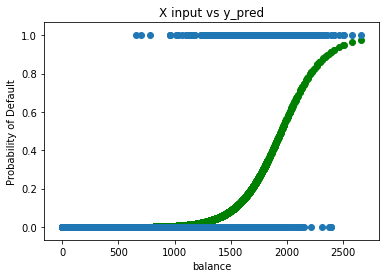

In [18]:
# Visualizing the output of Logistic Regression based on the X inputs and y_pred

y_pred = logreg.predict_proba(X)                               
plt.scatter(X.values, y_pred[:,1], color='green')              # Output of logistic Regression                     
plt.scatter(X.values, y)                                       # Actual data
plt.xlabel('balance')
plt.ylabel('Probability of Default')
plt.title('X input vs y_pred')
plt.show()

In [19]:
# splitting the features and labels

X2 = cred_df.drop('default',axis = 1)
y2 = cred_df['default']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# splitting the data into train and test with 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [22]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(7000, 3)

(3000, 3)

(7000,)

(3000,)

In [23]:
# Actual Values of y_test
y_test.value_counts()

0    2906
1      94
Name: default, dtype: int64

In [24]:
# Building logistic regression model

from sklearn import metrics
logreg2 = LogisticRegression(C=0.6)

In [25]:
# fitting logistic regression model with x and y attributes of train data

logreg2.fit(x_train, y_train)

C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred_test = logreg2.predict(x_test)
y_pred_train = logreg2.predict(x_train)

#### Metrics for Logistic Regression 

In [27]:
# comparing the metrics of predicted label and real label of test data
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

Test Accuracy:  0.9683333333333334


In [28]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_pred_test)

In [30]:
print(conf)

[[2905    1]
 [  94    0]]


In [31]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred_test).ravel()

In [32]:
TN
FP
FN
TP

2905

1

94

0

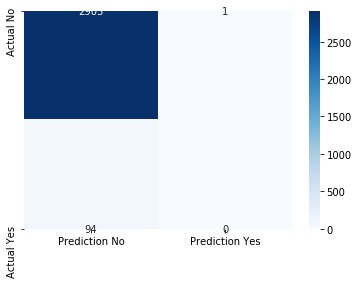

In [33]:
#Visualize Confusion Matrix
sns.heatmap(conf,cmap = 'Blues',xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='g')

In [34]:
# Creating Classification Report
cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2906
           1       0.00      0.00      0.00        94

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.94      0.97      0.95      3000

